In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix daily top 10.csv')
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
8,2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11
9,2020-04-01,10,9,-,Uncorked,Movie,Yes,"Mar 27, 2020",4,15


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [6]:
print('Year to Date Rank : ', df['Year to Date Rank'].unique())
print('Last Week Rank    : ', df['Last Week Rank'].unique())
print('Netflix Exclusive : ', df['Netflix Exclusive'].unique())

Year to Date Rank :  ['1' '2' '3' '4' '5' '6' '10' '7' '8' '9' '-']
Last Week Rank    :  ['1' '-' '2' '4' '5' '3' '8' '9' '6' '7' '10']
Netflix Exclusive :  ['Yes' nan]


In [7]:
df['Year to Date Rank'] = df['Year to Date Rank'].replace('-',0)
df['Last Week Rank'] = df['Last Week Rank'].replace('-',0)
df['Netflix Exclusive'] = df['Netflix Exclusive'].fillna('NO')

In [8]:
df.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     7100 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [10]:
df['As of'] = pd.to_datetime(df['As of'])
df['Year to Date Rank'] = df['Year to Date Rank'].astype('int64')
df['Last Week Rank'] = df['Last Week Rank'].astype('int64')
df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   int64         
 3   Last Week Rank        7100 non-null   int64         
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 554.8+ KB


In [12]:
df.head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90
1,2020-04-01,2,2,0,Ozark,TV Show,Yes,2017-07-21,5,45
2,2020-04-01,3,3,2,All American,TV Show,NO,2019-03-28,9,76
3,2020-04-01,4,4,0,Blood Father,Movie,NO,2020-03-26,5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55
5,2020-04-01,6,6,0,Car Masters: Rust to Riches,TV Show,Yes,2018-09-14,4,14
6,2020-04-01,7,10,0,Unorthodox,TV Show,Yes,2020-03-26,2,5
7,2020-04-01,8,7,5,Love is Blind,TV Show,Yes,2020-02-13,9,40
8,2020-04-01,9,8,0,Badland,Movie,NO,2020-03-26,4,11
9,2020-04-01,10,9,0,Uncorked,Movie,Yes,2020-03-27,4,15


In [13]:
df.describe()

,As of,Rank,Year to Date Rank,Last Week Rank,Netflix Release Date,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000,7100,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,4.439296,1.737324,2020-06-21 08:05:32.619718144,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,0.000000,0.000000,2007-01-15 00:00:00,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,2.000000,0.000000,2020-04-26 00:00:00,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,4.000000,0.000000,2020-10-02 00:00:00,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,7.000000,3.000000,2021-05-14 00:00:00,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,10.000000,10.000000,2022-03-04 00:00:00,428.000000,1474.000000
std,NaN,2.872484,3.041267,2.620020,NaN,58.473789,213.861642


In [14]:
print('Type : ', df['Type'].unique())

Type :  ['TV Show' 'Movie' 'Stand-Up Comedy' 'Concert/Perf…']


In [15]:
df['Type'].value_counts()

Type
TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: count, dtype: int64

In [16]:
df[df['Type'] == 'Concert/Perf…'].groupby(by=df['Title'])['Days In Top 10'].max().sort_values(ascending=False)

Title
Ariana Grande: Excuse Me, I…    2
Name: Days In Top 10, dtype: int64

### Netflix Movie perform IN Top 10

In [17]:
movie = df[df['Type'] == 'Movie']
movie_top = movie.groupby(by=df['Title'])['Days In Top 10'].max().sort_values(ascending= False)
movie_top

Title
The Mitchells vs. The Machines    31
How the Grinch Stole Christmas    29
Vivo                              29
365 Days                          28
Despicable Me 2                   27
                                  ..
The BFG                            1
Dark Shadows                       1
House at the End of the Street     1
Trollhunters: Rise of the T…       1
How to Train Your Dragon 2         1
Name: Days In Top 10, Length: 355, dtype: int64

In [26]:
mov = movie.groupby(df['Title']).max()
mov = mov.sort_values(by='Days In Top 10', ascending = False)
mov = mov[:11]
mov

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
Title,,,,,,,,,,
The Mitchells vs. The Machines,2021-05-31,10,10,8,The Mitchells vs. The Machines,Movie,Yes,2021-04-30,31,204
How the Grinch Stole Christmas,2020-12-28,10,10,10,How the Grinch Stole Christmas,Movie,NO,2017-06-01,29,137
Vivo,2021-09-30,10,10,9,Vivo,Movie,Yes,2021-08-06,29,166
365 Days,2020-07-05,10,10,4,365 Days,Movie,Yes,2020-07-07,28,213
Despicable Me 2,2022-03-01,10,10,10,Despicable Me 2,Movie,NO,2022-02-01,27,88
Donât Look Up,2022-01-19,10,9,5,Donât Look Up,Movie,Yes,2021-12-24,26,189
The Christmas Chronicles 2,2021-12-26,10,10,9,The Christmas Chronicles 2,Movie,Yes,2020-11-25,24,132
Illumination Presents The G…,2020-12-04,9,9,9,Illumination Presents The G…,Movie,NO,2019-06-05,24,95
We Can Be Heroes,2021-01-18,10,9,6,We Can Be Heroes,Movie,Yes,2020-12-25,24,144


<Figure size 2400x1200 with 0 Axes>

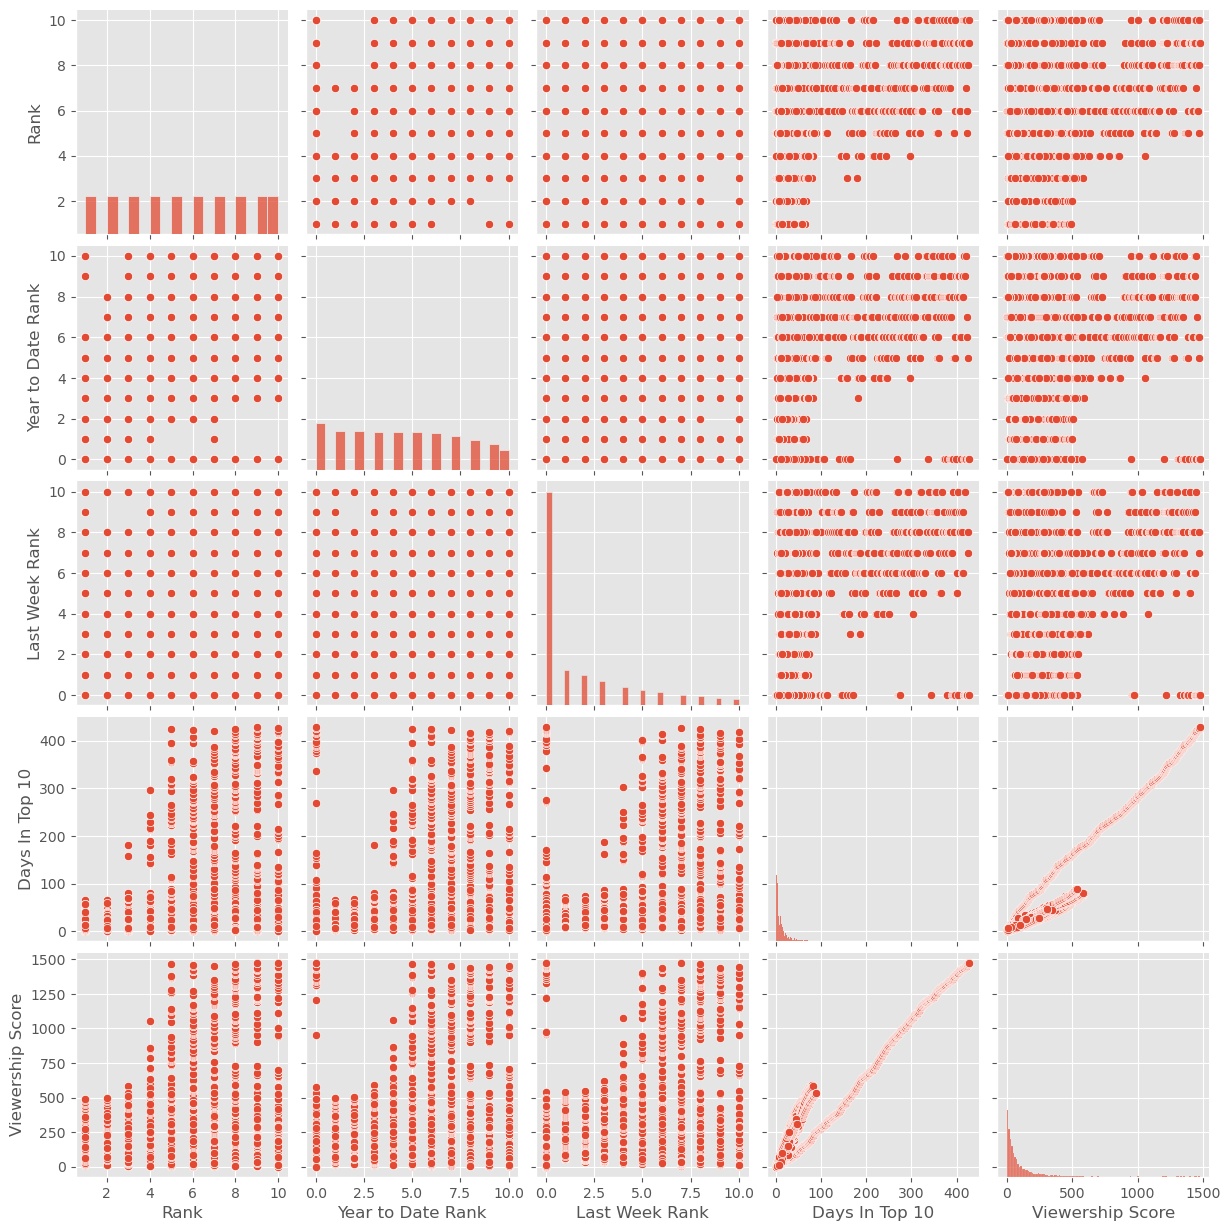

In [28]:
plt.figure(figsize = (12,6), dpi = 200)
sns.pairplot(df)
plt.show()

In [29]:
df['Title'].value_counts()

Title
Cocomelon                       428
Ozark                            85
Cobra Kai                        81
Manifest                         80
The Queenâs Gambit             73
                               ... 
The Office                        1
Animals on the Loose: A You…      1
Dark                              1
The Secret Life of Pets 2         1
Step Up Revolution                1
Name: count, Length: 645, dtype: int64

In [31]:
df[df['Days In Top 10']>=100]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2886,2021-01-14,7,6,8,Cocomelon,TV Show,NO,2020-06-01,100,287
2896,2021-01-15,7,7,10,Cocomelon,TV Show,NO,2020-06-01,101,291
2909,2021-01-16,10,7,9,Cocomelon,TV Show,NO,2020-06-01,102,292
2919,2021-01-17,10,10,9,Cocomelon,TV Show,NO,2020-06-01,103,293
3019,2021-01-27,10,0,0,Cocomelon,TV Show,NO,2020-06-01,104,294
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,0,Cocomelon,TV Show,NO,2020-06-01,424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NO,2020-06-01,425,1469
6718,2022-02-01,9,0,7,Cocomelon,TV Show,NO,2020-06-01,426,1471
6959,2022-02-25,10,0,0,Cocomelon,TV Show,NO,2020-06-01,427,1472


<Axes: ylabel='Type'>

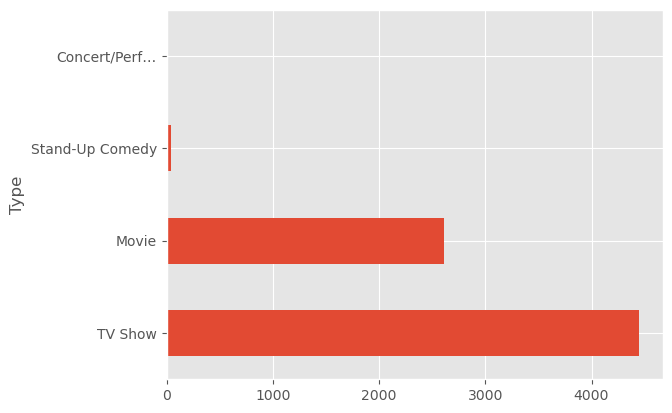

In [32]:
df.Type.value_counts().plot(kind = 'barh')

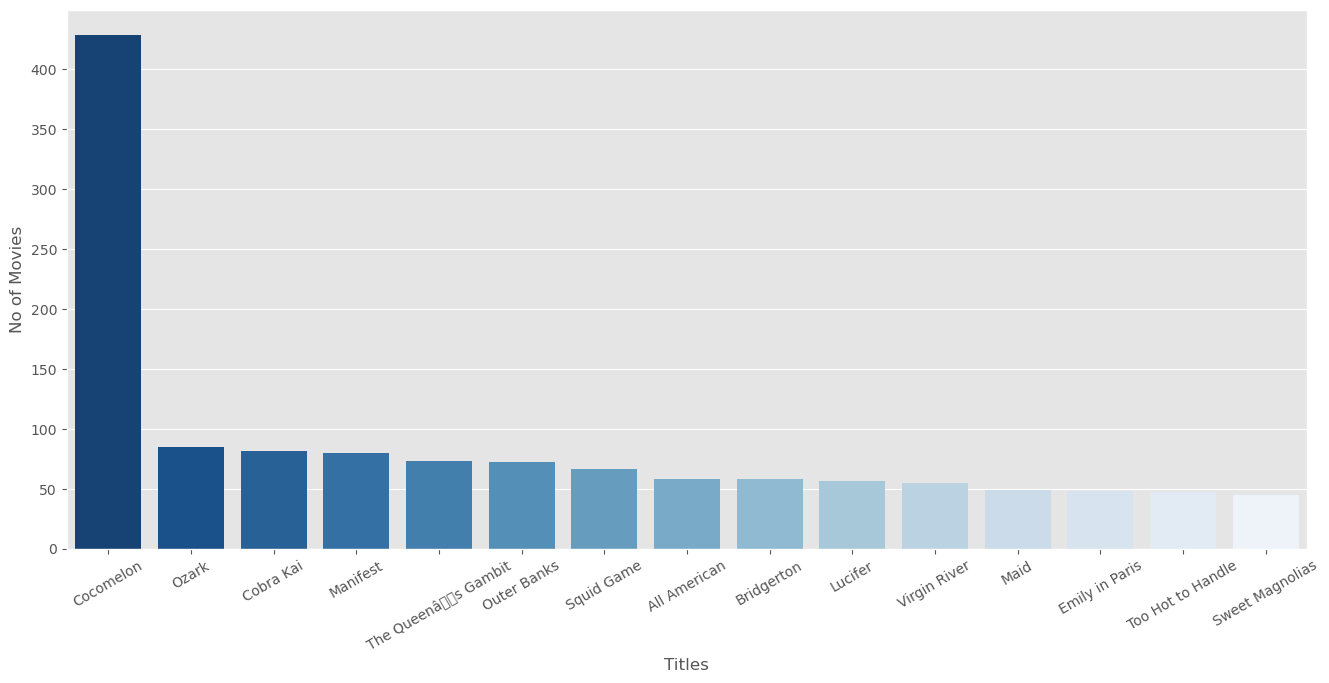

In [38]:
plt.figure(figsize=(16,7))
sns.countplot(x='Title', data = df, palette = 'Blues_r', order = df['Title'].value_counts().index[0:15])
plt.xlabel("Titles")
plt.ylabel("No of Movies")
plt.xticks(rotation = 30)
plt.show()

<Axes: >

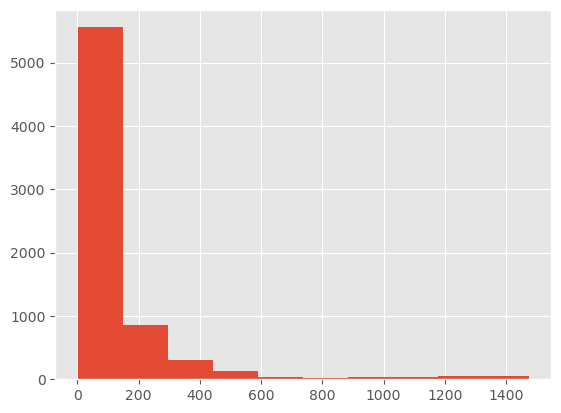

In [39]:
df['Viewership Score'].hist()

In [40]:
df[df['Viewership Score']>=1200]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
5467,2021-09-29,8,7,7,Cocomelon,TV Show,NO,2020-06-01,336,1202
5488,2021-10-01,9,0,9,Cocomelon,TV Show,NO,2020-06-01,337,1204
5498,2021-10-02,9,9,10,Cocomelon,TV Show,NO,2020-06-01,338,1206
5508,2021-10-03,9,9,9,Cocomelon,TV Show,NO,2020-06-01,339,1208
5518,2021-10-04,9,9,10,Cocomelon,TV Show,NO,2020-06-01,340,1210
...,...,...,...,...,...,...,...,...,...,...
6674,2022-01-28,5,6,0,Cocomelon,TV Show,NO,2020-06-01,424,1466
6687,2022-01-29,8,5,8,Cocomelon,TV Show,NO,2020-06-01,425,1469
6718,2022-02-01,9,0,7,Cocomelon,TV Show,NO,2020-06-01,426,1471
6959,2022-02-25,10,0,0,Cocomelon,TV Show,NO,2020-06-01,427,1472
